In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', index_col=0, nrows=1000000)
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [3]:
df_lectures = pd.read_csv('lectures.csv')
df_lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [4]:
df_questions = pd.read_csv('questions.csv')
df_questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [5]:
# Calculating number of questions all / none of students answered correctly

# filtering lectures out of main dataframe
df_answers = df[df.content_type_id == 0]

# Grouping data by content_id column, 
# using mean function to evaluate percentage of correct answers
df_correct_answers_percentage = df_answers.groupby(['content_id']).mean()['answered_correctly'] * 100

print(len(df_answers), '- quantity of questions, represented in DataFrame')

print(len(df_correct_answers_percentage[df_correct_answers_percentage == 100]),
      '- quantity of questions all students answered correctly')

print(len(df_correct_answers_percentage[df_correct_answers_percentage == 0]),
      '- quantity of questions none of students answered correctly')

980093 - quantity of questions, represented in DataFrame
978 - quantity of questions all students answered correctly
158 - quantity of questions none of students answered correctly


In [6]:
# Analysing parts of test to identify the hardest one

# merging two dataframes by question_id and content_id
df_part = df.merge(df_questions[['question_id', 'part']],
                   how='left', left_on='content_id', right_on='question_id')

# Groupping data by part number and drafting a bar chart on it
df_part.groupby(['part']).mean()['answered_correctly']

part
1.0    0.712738
2.0    0.700154
3.0    0.676469
4.0    0.597976
5.0    0.594769
6.0    0.636272
7.0    0.636854
Name: answered_correctly, dtype: float64

<AxesSubplot:xlabel='part'>

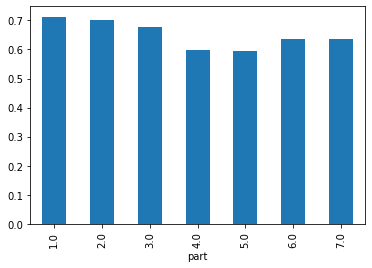

In [7]:
# Chart based on groupped data shown above
df_part.groupby(['part']).mean()['answered_correctly'].plot(kind='bar')

In [ ]:
# numbers of answers
# percentage of correct answers

In [8]:
# sorted by user id
user_list = df[['user_id','answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count'])
user_list.columns = ["answered_correctly_user_mean", 'sum_correct', 'count']
user_list.sort_values(by=['count'], ascending = False)
user_list

,answered_correctly_user_mean,sum_correct,count
user_id,,,
115,0.695652,32,46
124,0.233333,7,30
2746,0.500000,10,20
5382,0.632812,81,128
8623,0.598214,67,112
...,...,...,...
20913319,0.560096,233,416
20913864,0.333333,7,21
20938253,0.575701,308,535


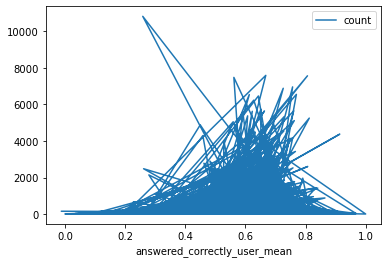

In [12]:
user_list.plot(y='count', x = 'answered_correctly_user_mean');

In [13]:
user_list[user_list['answered_correctly_user_mean'] == user_list['answered_correctly_user_mean'].max()].sort_values(by=['count'], ascending = False)

,answered_correctly_user_mean,sum_correct,count
user_id,,,
1880240,1.0,1,1


In [14]:
#quantile tests
print('quantile_0.25 доли хороших тестов =', user_list['answered_correctly_user_mean'].quantile( 0.25 ))
print('quantile_0.5 доли хороших тестов =', user_list['answered_correctly_user_mean'].quantile( 0.5 ))
print('quantile_0.75 доли хороших тестов =', user_list['answered_correctly_user_mean'].quantile( 0.75 ))

quantile_0.25 доли хороших тестов = 0.425
quantile_0.5 доли хороших тестов = 0.55
quantile_0.75 доли хороших тестов = 0.6470588235294118


In [15]:
user_list[user_list['count'] > user_list['count'].quantile( 0.5 ) ].sort_values(by=['count'], ascending = False)

,answered_correctly_user_mean,sum_correct,count
user_id,,,
7171715,0.258082,2794,10826
18122922,0.667589,5069,7593
1283420,0.806315,6103,7569
9418512,0.561347,4200,7482
4421282,0.756823,5269,6962
...,...,...,...
5443276,0.523810,22,42
7929581,0.761905,32,42
5257606,0.571429,24,42
